# Implement k-NN for Iris Classification

We are going to use scikit-learn to build a KNN Classification model to classify iris flowers using the popular iris dataset. You can learn more about the iris data set in it's Wikipedia entry
[Iris flower data set](https://en.wikipedia.org/wiki/Iris_flower_data_set).

### Import Libraries

Before we get started, we need to import a few libraries. Execute the code cell below. Remember, run code in a cell by selecting the cell, holding the shift key, and pressing enter/return.

In [1]:
import pandas as pd
import matplotlib
%matplotlib notebook
import matplotlib.pyplot as plt
from helper2 import visualize_knn

We will also import the scikit-learn `KNeighborsClassifier`, the `train_test_split` function for splitting the data into training and test sets, and the metric `accuracy_score` and `confusion_matrix` to evaluate our model.

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

### Step 1: Load the Iris Data Set

Next we will load the data from the iris data set and store it in a dataframe named `dfiris`. Rather than examining the full dataset, we will just examine ten randomly selected items.

Notice that the data set contains four attributes, or features, of an iris flower and the species to which it belongs. There are three species, or labels, that will be predicted: iris_setosa, iris-versicolor and iris-virginica. 

Therefore this is a multi-class problem; a flower can be classified as belonging to one of three classes.

In [3]:
dfiris = pd.read_csv('Iris_Data.csv')
dfiris.sample(n=10, replace=False, random_state=1)

,sepal_length,sepal_width,petal_length,petal_width,species
14,5.8,4.0,1.2,0.2,Iris-setosa
98,5.1,2.5,3.0,1.1,Iris-versicolor
75,6.6,3.0,4.4,1.4,Iris-versicolor
16,5.4,3.9,1.3,0.4,Iris-setosa
131,7.9,3.8,6.4,2.0,Iris-virginica
56,6.3,3.3,4.7,1.6,Iris-versicolor
141,6.9,3.1,5.1,2.3,Iris-virginica
44,5.1,3.8,1.9,0.4,Iris-setosa
29,4.7,3.2,1.6,0.2,Iris-setosa
120,6.9,3.2,5.7,2.3,Iris-virginica


### Visualize the k-NN Algorithm

The following code cell plots 50 data points from the iris dataset using two features: petal length, and petal width. You should be able to click anywhere on the plot to add a test point. The function should then draw direct connections from your test point to the k  nearest neighbors. 

You can change the number of neighbors and examine the results.

<IPython.core.display.Javascript object>


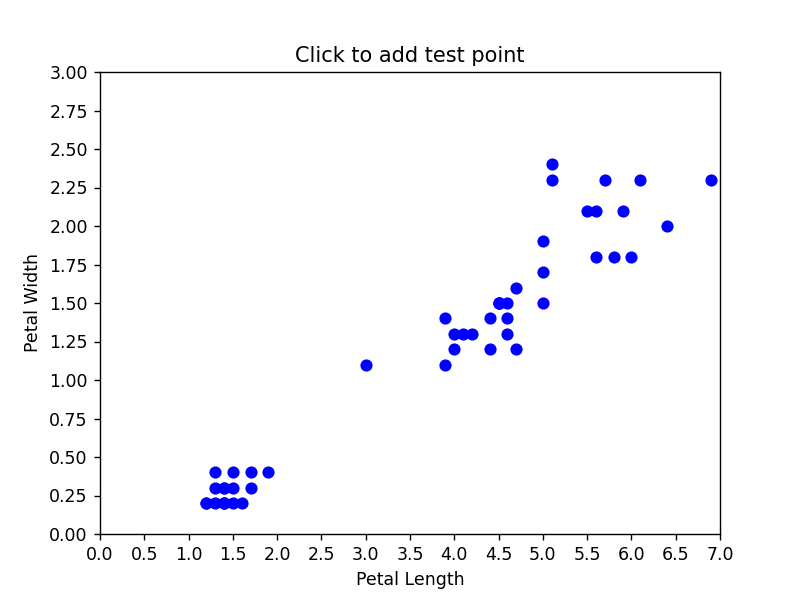

3


In [4]:
number_of_neighbors = 3
visualize_knn(number_of_neighbors)

### Step 2: Create labeled examples from our data set for the training phase

Let's extract variables from our data set to create labeled examples. The code cell below carries out the following steps:

* Extracts `petal_length` and `petal_width` features from `dfiris` and assign it to the variable `X`. It uses the `to_frame()` method on `X` to keep it as a pandas data frame instead of a series.
* Extracts the `species` data from `dfiris` and assigns it to the variable `y`.
* Prints the values of `X` and `y`

Execute the code cell below and inspect the results. You will see that we have 150 labeled examples. Each example contains two features (`petal_length` and `petal_width`) and one label (`species`).


In [5]:
x = dfiris[['petal_length', 'petal_width']]
y = dfiris['species'].to_frame()
print(x)
print(y)

     petal_length  petal_width
0             1.4          0.2
1             1.4          0.2
2             1.3          0.2
3             1.5          0.2
4             1.4          0.2
..            ...          ...
145           5.2          2.3
146           5.0          1.9
147           5.2          2.0
148           5.4          2.3
149           5.1          1.8

[150 rows x 2 columns]
            species
0       Iris-setosa
1       Iris-setosa
2       Iris-setosa
3       Iris-setosa
4       Iris-setosa
..              ...
145  Iris-virginica
146  Iris-virginica
147  Iris-virginica
148  Iris-virginica
149  Iris-virginica

[150 rows x 1 columns]


### Step 3: Create Training & Test Data Sets

Now that we have specified examples, we will need to split them into a training set and a test set.

We will refer to the training feature vectors as `x_train` with labels `y_train`. 

Our testing vectors are `x_test` with labels `y_test`. 

As a reminder, to predict the label or class `x_test`, we will look for the k-nearest neighbors in `x_train` and predict a label based on their labels in `y_train`. For evaluation, we will compare these labels against the true labels provided in `y_test`.


In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)


### Step 4: Fit a K-NN Model with the Training Set

The code cell below:

1. Creates a ```KNeighborsClassifier()``` object, specifying the number of neighbors (k) to be three, and assigns the result to the variable `model`.

2. Calls the ```.fit()``` method on ```model``` to fit the model to the training data. The first argument should be ```x_train``` and the second ```y_train```. Note that scikit-learn's KNeighborsClassifier's `.fit()` method requires the second parameter to be a 1D array. We use method `.values()` to convert our data frame to a numpy array and then `.ravel()` to convert it to a 1D array. We use the `.flatten()` method to make a copy of `y_train` instead of changing the original value. 
3. Uses the ```.predict()``` method on ```model``` with the argument ```x_test``` to use the fitted model to predict values for the testing data. Store the outcome in the variable ```y_pred```. We will compare these values to ```y_test``` later.

Execute the code cell below and notice how the different flowers in our test set were classified.

In [7]:
# Initialize the model
model = KNeighborsClassifier(n_neighbors=3)

# Train the model using the training sets
model.fit(x_train, y_train.values.ravel().flatten())

# Make predictions using the test set
prediction= model.predict(x_test) 

print(prediction)

['Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica']


### Step 5: Check the accuracy of your model

One way of assessing the performance of a classifier is by computing its accuracy on the test data, that is, what fraction of the test data are correctly predicted by the classifier.  Fortunately, sci-kit learn provides a built-in function named ```accuracy_score``` that carries out this computation; we imported it above, and you can read more about it [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html?highlight=accuracy_score#sklearn.metrics.accuracy_score). The accuracy score is a fraction between 0 and 1 indicating the fraction of predictions that match the true value in the test set.


Scikit-learn also provides a built-in function that produces a confusion matrix. We also imported it above, and you can read more about it [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html?highlight=confusion%20matrix#sklearn.metrics.confusion_matrix). Note that the code cell below generates a confusion matrix, and converts it into a data frame for the purpose of cleanly visualizing the matrix values.

Execute the code cell below to see the accuracy score of your model and the confusion matrix.

In [8]:
# Compute and print model's accuracy score
score = accuracy_score(y_test, prediction)
print('Accuracy score of model: ' + str(score))


# Display a confusion matrix
print('Confusion Matrix for the model: ')

pd.DataFrame(
confusion_matrix(y_test, prediction, labels=['Iris-virginica', 'Iris-setosa', 'Iris-versicolor']),
columns=['Predicted Iris-virginica', 'Predicted Iris-setosa', 'Predicted Iris-versicolor'],
index=['Actual Iris-virginica', 'Actual Iris-setosa', 'Actual Iris-versicolor']
)


Accuracy score of model: 0.9333333333333333
Confusion Matrix for the model: 


,Predicted Iris-virginica,Predicted Iris-setosa,Predicted Iris-versicolor
Actual Iris-virginica,8,0,1
Actual Iris-setosa,0,16,0
Actual Iris-versicolor,1,0,4


### Step 6: Train on Different Values of K

The code cell below runs the k-NN algorithm on all features in the iris data set and trains using different values for K (K=1 to k=100). Execute the code cell below and compare the resulting accuracy scores to see how the hyperparameter K affects the model's performance.

In [9]:
x = dfiris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = dfiris['species'].to_frame()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

scores = pd.DataFrame(columns = ['k','Score'])

for i in range(1,101):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train, y_train.values.ravel().flatten())
    prediction= model.predict(x_test) 
    score = accuracy_score(y_test, prediction)
    print('k=' + str(i) + ', accuracy score: ' + str(score))
    scores = scores.append({'k':i, 'Score': score},ignore_index = True)



k=1, accuracy score: 0.9333333333333333
k=2, accuracy score: 0.9333333333333333
k=3, accuracy score: 0.9666666666666667
k=4, accuracy score: 0.9666666666666667
k=5, accuracy score: 0.9666666666666667
k=6, accuracy score: 0.9666666666666667
k=7, accuracy score: 0.9666666666666667
k=8, accuracy score: 0.9666666666666667
k=9, accuracy score: 0.9666666666666667
k=10, accuracy score: 0.9666666666666667
k=11, accuracy score: 0.9666666666666667
k=12, accuracy score: 0.9666666666666667
k=13, accuracy score: 0.9666666666666667
k=14, accuracy score: 0.9666666666666667
k=15, accuracy score: 0.9666666666666667
k=16, accuracy score: 0.9666666666666667
k=17, accuracy score: 0.9666666666666667
k=18, accuracy score: 0.9666666666666667
k=19, accuracy score: 0.9666666666666667
k=20, accuracy score: 0.9333333333333333
k=21, accuracy score: 0.9666666666666667
k=22, accuracy score: 0.9333333333333333
k=23, accuracy score: 0.9666666666666667
k=24, accuracy score: 0.9666666666666667
k=25, accuracy score: 0.9

### Step 7: Plot the above accuracy scores

<IPython.core.display.Javascript object>


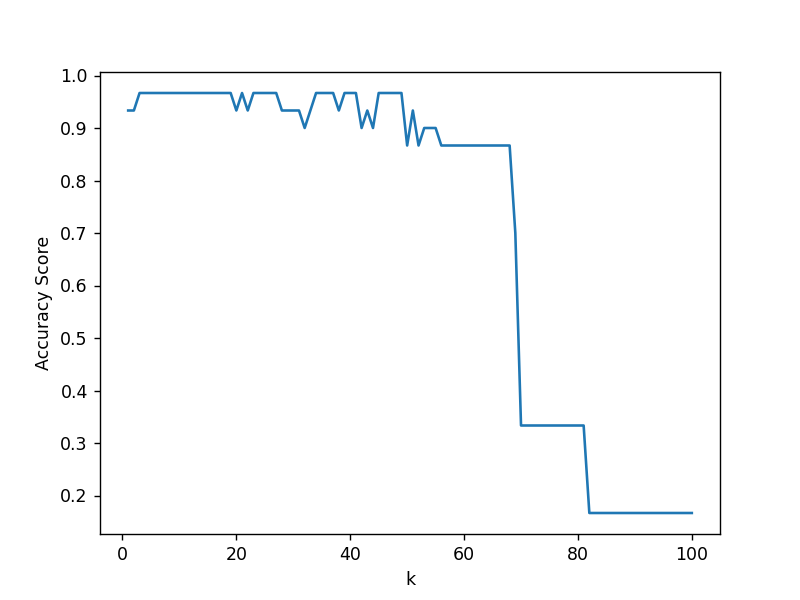

In [10]:
%matplotlib notebook
plt.plot('k','Score', data=scores)
plt.xlabel('k');
plt.ylabel('Accuracy Score');

For more information on the `KNeighborsClassifier`, visit the online [scikit-learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html).